<a href="https://colab.research.google.com/github/UdayLab/japan/blob/main/notebooks/KDD_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walk through: Knowledge Discovery in Big Data


> Illustration with 5-year nation-wide air pollution data of Japan



## Introduction

Knowledge discovery in data in data has the following five steps:



1.   Selection : selecting the right data from the whole data available
2.   Preprocessing : Modifying the data to remove abnormalities and bring consistency
3.   Transform : Changing the data format so that the machine learning algorithm can accept it.
4.   Data mining : Applying the knowledge discovery algorithms
5.   Interpretation/Evalution : Analyze the discovered knowledge.


In the below figure, left-side presents the KDD process and the right-side illustrates the example. Using the air pollution data, we illustrate the KDD process.

![](https://drive.google.com/uc?export=view&id=1Et62teoZoTYQgxGCw3qRiJniJLD1G3c6)

***

## Step 0: Data


![](https://drive.google.com/uc?export=view&id=1E3UZfjL8IDqtOTmECm3sTm5fHPr57GoC)


## About the data
Air pollution is a significant cause of the cardio-respiratory problems reported in Japan. On average, forty thousand people die annually in Japan due to pollution [(click here)](https://www.statista.com/statistics/935022/number-deaths-air-pollution-japan/#:~:text=In%202019%2C%20the%20number%20of,attributable%20to%20air%20pollution%20exposure.). To confront this problem, The Ministry of Environment, Japan, has set up a sensor network system, [SORAMAME](https://soramame.env.go.jp/), to monitor pollution in Japan. Each sensor in this network collects pollution levels of various air pollutants (e.g., SO2, NO2, and PM2.5) at hourly intervals.

In this experiment, we will be using the 5+ years of PM 2.5 pollutants data generated by all sensors situated throughout Japan.

### Step 0.1: Download the air pollution dataset

In [ ]:
!wget https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv

--2024-11-02 14:23:04--  https://www.dropbox.com/s/wa8d1sujzlx56hh/ETL_DATA_new.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/xfqhfaqam1mbvmlapv5z1/ETL_DATA_new.csv?rlkey=fcox2uze73hrreid6e78nvufg [following]
--2024-11-02 14:23:04--  https://www.dropbox.com/scl/fi/xfqhfaqam1mbvmlapv5z1/ETL_DATA_new.csv?rlkey=fcox2uze73hrreid6e78nvufg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d47e2076c037ce0675fdfb1e6.dl.dropboxusercontent.com/cd/0/inline/CdndpWs-uw6uwPO94_skiJO5s7w2SsJuMlmF37ZdXyOt11-4olzhgrRd5uYFhVWQpvkppNmK9sUh7nxUFgb8xkew-xgJKtHqUeGW_JhCWXy7j5VtlIQpWa4CjCs8KKbsjpLwy4hSHegKSY9RwUyJBqfR/file# [following]
--2024-11-02 14:23:05--  https://uc9d47e2076c037ce0675fdfb1e6.dl.dropboxusercontent.com/

### Step 0.2: Read the dataset and view it

In [ ]:
import pandas as pd
dataset = pd.read_csv('ETL_DATA_new.csv', index_col=0)

dataset
# you can notice that dataset is collected from 2018-01-01 01:00:00 hours to 2023-04-25 22:00:00 hours (5+ years)

,TimeStamp,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,2018-01-01 01:00:00,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,2018-01-01 02:00:00,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,2018-01-01 03:00:00,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,2018-01-01 04:00:00,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,2018-01-01 05:00:00,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,2023-04-25 18:00:00,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,2023-04-25 19:00:00,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,2023-04-25 20:00:00,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


Observations:

> 1. __Format of the dataset:__

     timestamp _tabSpace_ sensorLocation1 _tabSpace_ sensorLocation2 _tabSpace_ ... _tabSpace_ sensorLocationN


> 2. If a sensor does not have a location information, it will have the title "unnamed"

> 3. "NaN" value in a cell provides the information that the corresponding sensor has not recorded the value of an air pollutant at a particular timestamp




***

### Step 1: Selection



![](https://drive.google.com/uc?export=view&id=1E0aMqWVomUK54cI3MF8AXS9i-ZXwCp_W)

#### Step 1.1: Removing timestamp information

Since the index of the data implicitly records the timestamp information, we _select_ the data without timestamp. In other words, our target data is the data without timestamp information.

In [ ]:
dataset.drop('TimeStamp', inplace=True, axis=1)

dataset

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314),Unnamed: 1832
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0,NaN
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0,NaN
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0,NaN
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46000,NaN,NaN,NaN,22.0,3.0,15.0,NaN,NaN,NaN,16.0,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46001,NaN,NaN,NaN,21.0,2.0,19.0,NaN,NaN,NaN,14.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
46002,NaN,NaN,NaN,20.0,10.0,19.0,NaN,NaN,NaN,13.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN


#### Step 1.2: Removing Sensors that do not have Point information

If a sensor does not have location information, we do not know from whether the data was collected. Henceforth, we remove the data of the sensors that do not have location information.

In [ ]:
sensorsWithPointInformation = [col for col in dataset if 'Unnamed' in col]
dataset.drop(columns=sensorsWithPointInformation, inplace=True, axis=1)
dataset.head() # This is our target data for analysis

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,13.0,18.0,20.0,NaN,NaN,NaN,23.0,...,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,4.0
1,NaN,NaN,11.0,12.0,22.0,15.0,NaN,NaN,NaN,32.0,...,0.0,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,5.0
2,NaN,NaN,7.0,12.0,19.0,16.0,NaN,NaN,NaN,32.0,...,2.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,NaN,6.0
3,NaN,NaN,5.0,11.0,16.0,11.0,NaN,NaN,NaN,28.0,...,3.0,NaN,2.0,NaN,NaN,NaN,11.0,NaN,NaN,11.0
4,NaN,NaN,6.0,11.0,10.0,8.0,NaN,NaN,NaN,27.0,...,5.0,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0


**Observation:** Out of 1831 sensors (or columns) in Step 1.1, only 1764 sensors (or columns) were considered for the analysis.

This is our target data. We will be performing analytics on this data and discover interesting knowledge.

***

### Step 2: Preprocessing

In this step, we will be handling the abnormalities in the data.


![](https://drive.google.com/uc?export=view&id=1E6GIr62Wxi-JVTOs1VI7zKuLoVH1LbzA)


#### Step 2.1: Fillup the missing values (NaN) with zero

In [ ]:
dataset = dataset.fillna(0)
dataset.head()

,Point(139.0794379 36.3727776),Point(139.1051411 36.3963822),Point(139.0960211 36.4047323),Point(139.0428727 36.3816035),Point(138.9955116 36.33801589999999),Point(139.342672 36.4105658),Point(139.3526243 36.3695416),Point(139.1945766 36.31351160000001),Point(139.2076974 36.3034767),Point(139.3817322 36.2909131),...,Point(139.9239959 36.8062129),Point(139.9418164 36.7656467),Point(140.0549894 36.9688923),Point(139.8775674 36.3847082),Point(139.9101767 36.4393022),Point(139.9074816 36.4445767),Point(140.0934838 36.4673588),Point(139.7422865 36.2305774),Point(139.7151723 36.822353),Point(140.1510903 36.6598314)
,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,18.0,20.0,0.0,0.0,0.0,23.0,...,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0
1,0.0,0.0,11.0,12.0,22.0,15.0,0.0,0.0,0.0,32.0,...,0.0,0.0,6.0,0.0,0.0,0.0,9.0,0.0,0.0,5.0
2,0.0,0.0,7.0,12.0,19.0,16.0,0.0,0.0,0.0,32.0,...,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0
3,0.0,0.0,5.0,11.0,16.0,11.0,0.0,0.0,0.0,28.0,...,3.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0,11.0
4,0.0,0.0,6.0,11.0,10.0,8.0,0.0,0.0,0.0,27.0,...,5.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0


#### Step 2.2: Removing abnormal values in the data

PM2.5 values of a sensor in general vary from 0 to 250. Henceforth, if we find values that do not lie between 0 and 250, we prone those values by setting the value of zero.

(PM2.5 values can be above 250 also; however, such values are hard to find in Japan. So we set 250 as the upper bound.)

##### Step 2.2.1: Finding the maximum values recorded by each sensor

In [ ]:
maxValueInEachColumn = dataset.max() #Gathering the maximum PM2.5 value recorded by each sensor
maxValueInEachColumn      #Printing the maxValue of each sensor

,0
Point(139.0794379 36.3727776),0.0
Point(139.1051411 36.3963822),0.0
Point(139.0960211 36.4047323),110.0
Point(139.0428727 36.3816035),77.0
Point(138.9955116 36.33801589999999),200.0
...,...
Point(139.9074816 36.4445767),0.0
Point(140.0934838 36.4673588),137.0
Point(139.7422865 36.2305774),0.0
Point(139.7151723 36.822353),0.0


<Axes: >

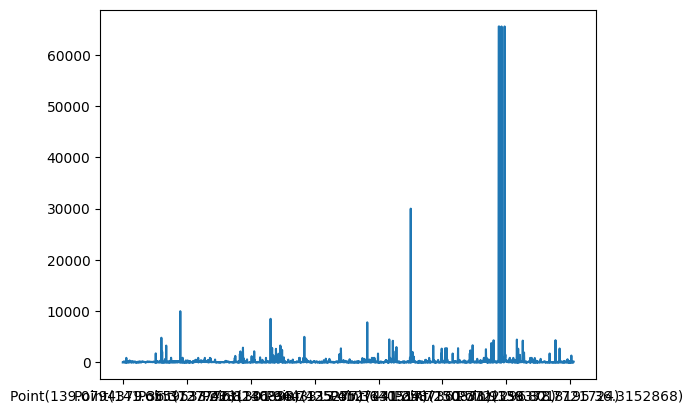

In [ ]:
maxValueInEachColumn.plot()  #point the maximum values recorded by each sensor.

__Observation:__ we can see many sensors have recorded high PM2.5 values greater than 250. Such values are generally outliers/abnormalities and are not useful for the analysis.

##### Step 2.2.2: Replacing the values greater than 250 to zero.

<Axes: >

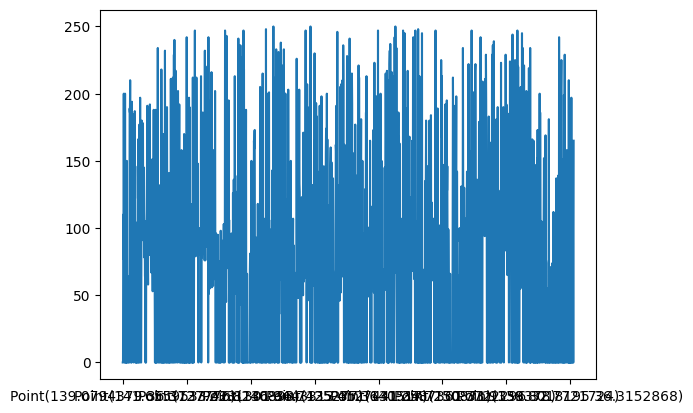

In [ ]:
dataset.where(dataset <= 250, 0, inplace=True)
dataset.max().plot()

__Observation:__ We can notice that the maximum values of every sensor are no more than the 250 value.

We will now check for the minimum values recorded by the sensors.

##### Step 2.2.3: Finding the minimum values recorded by each sensor

<Axes: >

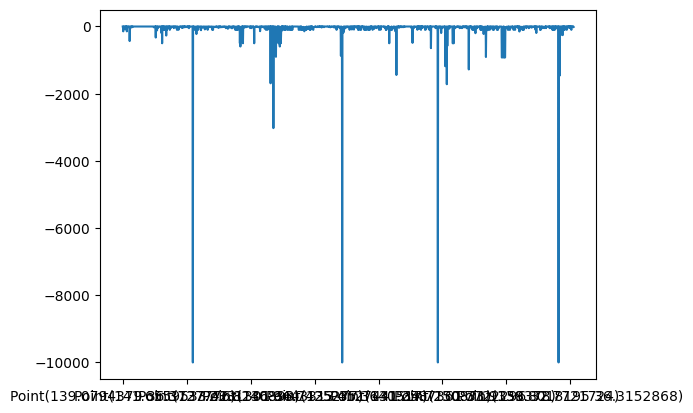

In [ ]:
minValueInEachColumn = dataset.min() #Reading the minimum PM2.5 value recorded by each sensor
minValueInEachColumn.plot()  #ploting them

#dataset.min().plot()      #memory efficient approach

__Observation:__ We can observe that many sensors have recorded negative PM2.5 values. Thus, we replace the negative PM2.5 values of each sensor with Zero

##### Step 2.2.4: Replacing the values less than zero to 0

<Axes: >

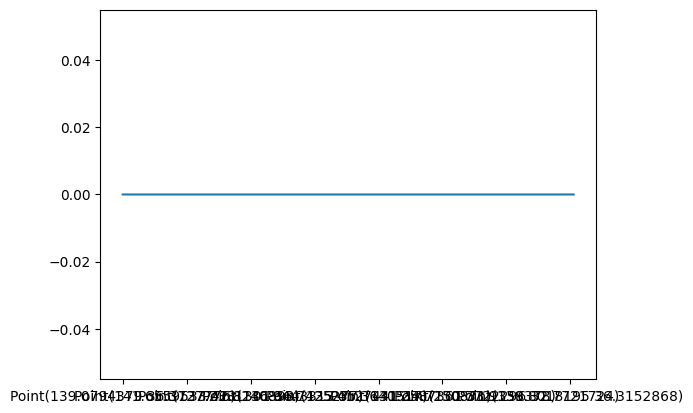

In [ ]:
dataset.where(dataset > 0, 0, inplace=True)
dataset.min().plot()

__Observation:__ The abnormal values were replaced to 0.


### Step 3: Data transformation

In this step, we will transform the processed data into a binary transactional database so that we can discover frequent patterns (or areas) that have recorded high levels of pollution.

![](https://drive.google.com/uc?export=view&id=1E0CqIDShlbjBq8s2sVcMbx9w-LzQht-Y)

#### Step 3.0: We will install the latest version of PAMI package to perform

- data transformation from data frame to transactional database

- frequent pattern mining

In [ ]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.9 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=998f3b26474c7c92f9eab132a2985ec1cfb48cfaff366e383b687eccc6783513
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: f

#### Step 3.1: Converting the data frame into a transactional database

As per the Japanese standards, the PM2.5 values greater than or equal to 35 are considered "unhealthy" for the people. Henceforth, we create a transactional database by considering the sensor values greater than or equal to 35.

In [ ]:
#TIME TAKING PROCESS DEPENDING ON THE DATA.

from PAMI.extras.convert import DF2DB as db

obj = db.DF2DB(dataset)
obj.convert2TransactionalDatabase('PM25HeavyPollutionRecordingSensors.csv', '>=', 35)

'PM25HeavyPollutionRecordingSensors.csv'

#### Step 3.2: Printing few lines of the transactional database

In [ ]:
!head PM25HeavyPollutionRecordingSensors.csv

Point(139.750635 35.7977241)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9035901 35.8570293)	Point(139.9012134 35.6552406)	Point(139.8356927 35.6967785)	Point(139.7209595 35.6108138)	Point(139.7054233 35.7609043)	Point(139.8257782 35.7697167)	Point(139.8045157 35.77453510000001)	Point(139.8692678 35.7864558)	Point(139.8530976 35.7608755)	Point(139.8773135 35.6821907)	Point(137.1418898 34.9626945)	Point(136.8905668 35.0122987)	Point(136.6548337 35.0051925)	Point(139.4949175 36.2914457)
Point(139.7962265 35.8959041)	Point(139.8841693 35.8422674)	Point(139.3819898 36.2229999)	Point(139.9206727 35.684037)	Point(139.9785953 35.6880639)	Point(139.9033705 35.7876179)	Point(139.9123927 35.7995549)	Point(139.880097 35.953403)	Point(139.9012134 35.6552406)	Point(139.8276492 35.689975)	Point(139.8356927 35.6967785)	Point(139.7

Each line in this file represents the sensors that have recorded high levels of PM2.5 values at an hour.

### Step 4: Data Mining

Frequent pattern mining is a popular knowledge discovery technique in data mining. It aims to find those interesting hidden patterns that have appeared frequently in the data.

In this experiment, we will perform frequent pattern mining on the previously constructed PM2.5 transactioinal database and identify the locations that have recorded high levels of pollution.

![](https://drive.google.com/uc?export=view&id=1E3TxWjv-2uaFxoGTTRAyj6qYlelgDpIB)

#### Step 4.1: Understanding the distribution (or statistics) of data

Distribution of data plays a vital role in the success of a data mining task. Henceforth, let us analyze the distribution of the data.

Database size (total no of transactions) : 31462
Number of items : 1119
Minimum Transaction Size : 1
Average Transaction Size : 16.545896637213147
Maximum Transaction Size : 503
Standard Deviation Transaction Size : 39.73276427461552
Variance in Transaction Sizes : 1578.7427362530073
Sparsity : 0.9852136759274235


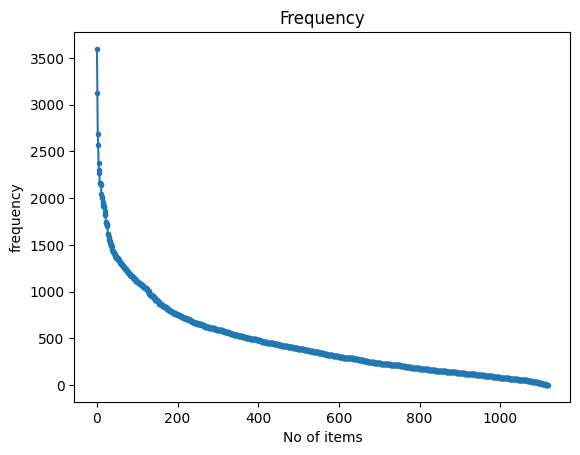

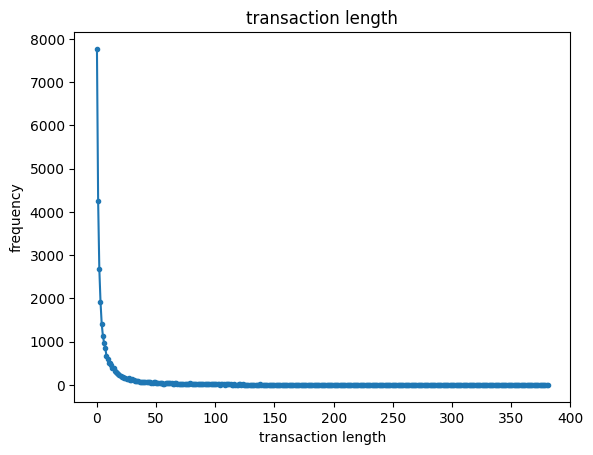

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('PM25HeavyPollutionRecordingSensors.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

#### Step 4.2: Mining Frequent Patterns using Apriori algorithm

In [ ]:
from PAMI.frequentPattern.basic import Apriori as ab
obj = ab.Apriori('PM25HeavyPollutionRecordingSensors.csv', 1000) #If the execution is taking too much time, kill the process and use a higher minimum support value.
obj.mine()
obj.printResults()
obj.save('soramameFrequentPatternsApriori_500.txt') #It is a good practise to store the parameters used for an experiment as a file name

Frequent patterns were generated successfully using Apriori algorithm 
Total number of Frequent Patterns: 137
Total Memory in USS: 2174447616
Total Memory in RSS 2232299520
Total ExecutionTime in ms: 0.9926929473876953


In [ ]:
from PAMI.frequentPattern.basic import Apriori as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'PM25HeavyPollutionRecordingSensors.csv'
seperator='\t'
minimumSupportCountList = [500, 1000, 1500, 2000, 2500]

In [ ]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

In [ ]:
for minSupCount in minimumSupportCountList:
    obj = alg.Apriori(inputFile, minSup=minSupCount,sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['Apriori', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 
Frequent patterns were generated successfully using Apriori algorithm 


In [ ]:
print(result)

  algorithm  minSup  patterns   runtime      memory
0   Apriori     500      1194  4.678235  2240327680
1   Apriori    1000       137  0.944774  2232127488
2   Apriori    1500        36  0.636155  2236428288
3   Apriori    2000        14  0.699830  2232053760
4   Apriori    2500         4  0.615047  2240360448


<Axes: xlabel='minSup'>

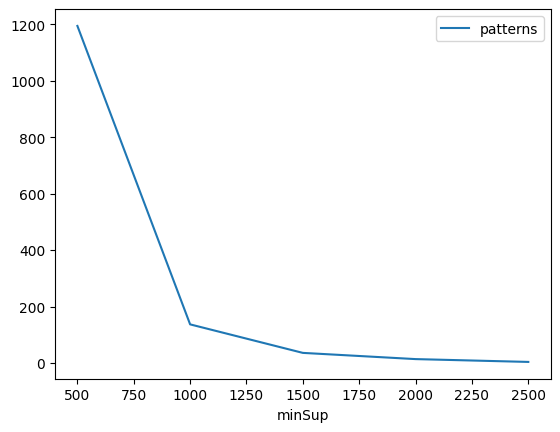

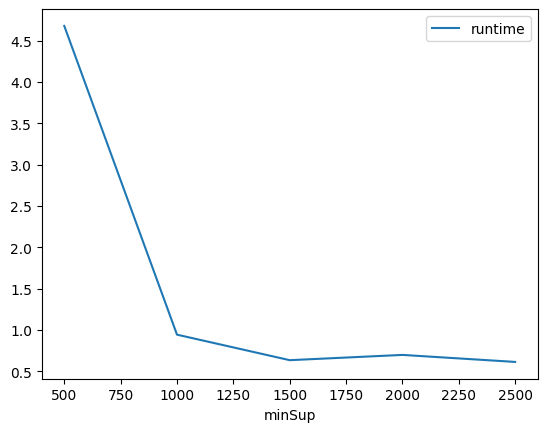

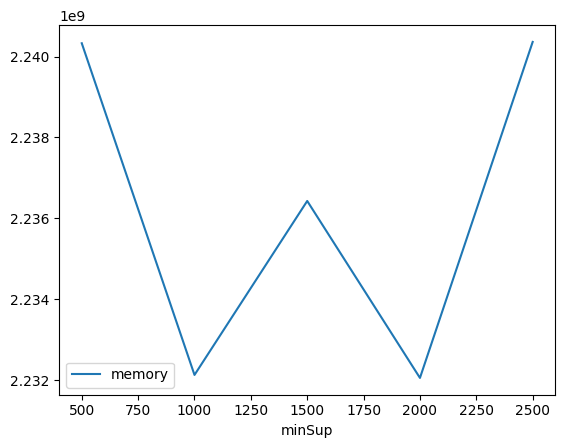

In [ ]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

In [26]:
from PAMI.extras.graph import DF2Tex as tex

In [27]:
obj = tex.DF2Tex()
obj.generateLatexCode(result, "minSup", "runtime", "algorithm")
obj.print_latex()
obj.save("runtimeApriori.tex")

\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{runtime}},
	xmin=500, xmax=2500,]
\addplot+  [red]
	coordinates {
(500,4.678234577178955)
(1000,0.9447739124298096)
(1500,0.6361546516418457)
(2000,0.6998302936553955)
(2500,0.6150472164154053)
	};   \addlegendentry{Apriori}
\end{axis}
LaTeX file saved as runtimeApriori.tex


In [28]:
obj = tex.DF2Tex()
obj.generateLatexCode(result, "minSup", "patterns", "algorithm")
obj.print_latex()
obj.save("patternsApriori.tex")

\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{patterns}},
	xmin=500, xmax=2500,]
\addplot+  [red]
	coordinates {
(500,1194)
(1000,137)
(1500,36)
(2000,14)
(2500,4)
	};   \addlegendentry{Apriori}
\end{axis}
LaTeX file saved as patternsApriori.tex


In [29]:
obj = tex.DF2Tex()
obj.generateLatexCode(result, "minSup", "memory", "algorithm")
obj.print_latex()
obj.save("memoryApriori.tex")

\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{memory}},
	xmin=500, xmax=2500,]
\addplot+  [red]
	coordinates {
(500,2240327680)
(1000,2232127488)
(1500,2236428288)
(2000,2232053760)
(2500,2240360448)
	};   \addlegendentry{Apriori}
\end{axis}
LaTeX file saved as memoryApriori.tex


***

### Step 5: Interpretation and Evaluation.

In this step, we will spatially visualize top-10 long patterns and make necessary interpretations.

![](https://drive.google.com/uc?export=view&id=1DwRdNbPphDKLGjoZy2bs2JoR53bjfGFY)

In [30]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('soramameFrequentPatternsApriori_500.txt',10)
obj.visualize(width=500,height=500)

Number 	 Pattern
2	Point(130.9805349 33.77587159999999)
3	Point(130.6939898 33.89368080000001)
4	Point(130.6384926 32.5010333)	Point(140.5781487 39.3100292)
5	Point(130.6384926 32.5010333)	Point(130.6999328 33.0093764)
6	Point(130.6384926 32.5010333)	Point(130.6118229 32.5174703)
7	Point(139.9717795 35.8439578)	Point(139.7962265 35.8959041)
8	Point(133.7597423 34.5165856)	Point(133.7401624 34.5278135)
9	Point(133.8171478 34.6075268)	Point(133.8362679 34.5899827)
10	Point(133.8171478 34.6075268)	Point(133.8265408 34.5995481)
11	Point(139.6681689 36.0701176)	Point(139.6623882 36.0656055)


**Knowledge**

The following interpretations can drawn from these figures:

1. Costal areas are observing high levels of pollution

2. Pollution was observed highly at Kyushu and Tokyo.

**References:**


1.   RAGE, Uday kiran (2023), “5+ Years of Multiple Time Series Data of Hourly PM2.5 Recordings Gathered from Various Sensors Located throughout Japan (1-1-2018 to 25-4-2023)”, Mendeley Data, V1, doi: 10.17632/phgrnvykmr.1
2.   PAMI: PAttern Mining toolkit. https://github.com/UdayLab/PAMI

